In [1]:
import numpy as np
import pandas as pd
from load_data import load_train_data

In [2]:
df = load_train_data()

In [3]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
df.shape

(12232, 7)

In [5]:
# genre列の文字列をコンマで区切ってリストに変換する関数
def split_genres(genre_str):
    return genre_str.split(", ")

df["genre"] = df["genre"].apply(split_genres)

In [6]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",TV,64,9.26,793665
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51,9.25,114262
3,9253,Steins;Gate,"[Sci-Fi, Thriller]",TV,24,9.17,673572
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51,9.16,151266


In [7]:
df['genre_count'] = df['genre'].apply(len)

In [8]:
df.head()

,anime_id,name,genre,type,episodes,rating,members,genre_count
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1,9.37,200630,4
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",TV,64,9.26,793665,7
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51,9.25,114262,7
3,9253,Steins;Gate,"[Sci-Fi, Thriller]",TV,24,9.17,673572,2
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51,9.16,151266,7


In [9]:
all_genres = set()
for genres in df['genre']:
    all_genres.update(genres)

# 重複を除いたジャンルのリストを表示
print(sorted(all_genres))

['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri']


In [10]:
print(len(all_genres))

43


In [11]:
# ジャンルのリストをソートして、インデックスを付ける
genre_list = sorted(list(all_genres))
genre_index = {genre: i for i, genre in enumerate(genre_list)}

# genreが含まれるかどうかを0/1で表現したndarrayを作成
num_rows = df.shape[0]
num_genres = len(genre_list)
genre_matrix = np.zeros((num_rows, num_genres))

for row_idx, genres in enumerate(df['genre']):
    for genre in genres:
        genre_idx = genre_index[genre]
        genre_matrix[row_idx, genre_idx] = 1

# 要素数を数える
genre_counts = genre_matrix.sum(axis=0)

In [12]:
genre_matrix.shape

(12232, 43)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


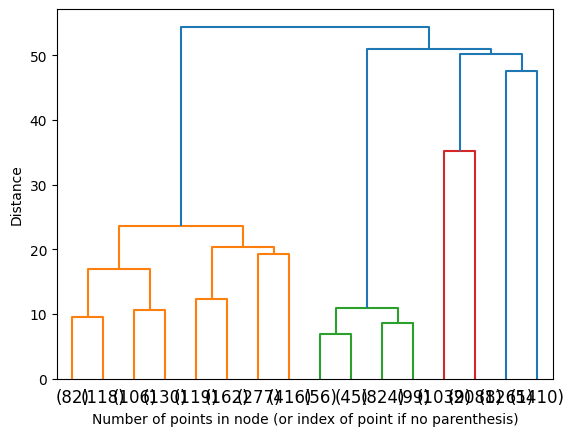

In [13]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# 階層型クラスタリングのモデルを作成
# n_clusters=None, distance_threshold=0 に設定して、フルツリーを作成
model = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', distance_threshold=0)

# クラスタリングを実行
model = model.fit(genre_matrix)

# デンドログラム用のリンケージ行列を作成
counts = np.zeros(model.children_.shape[0])
n_samples = len(model.labels_)
for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # 葉ノード
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

# デンドログラムを描画
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis)")
plt.ylabel("Distance")
plt.show()

In [14]:
genre_index

{'Action': 0,
 'Adventure': 1,
 'Cars': 2,
 'Comedy': 3,
 'Dementia': 4,
 'Demons': 5,
 'Drama': 6,
 'Ecchi': 7,
 'Fantasy': 8,
 'Game': 9,
 'Harem': 10,
 'Hentai': 11,
 'Historical': 12,
 'Horror': 13,
 'Josei': 14,
 'Kids': 15,
 'Magic': 16,
 'Martial Arts': 17,
 'Mecha': 18,
 'Military': 19,
 'Music': 20,
 'Mystery': 21,
 'Parody': 22,
 'Police': 23,
 'Psychological': 24,
 'Romance': 25,
 'Samurai': 26,
 'School': 27,
 'Sci-Fi': 28,
 'Seinen': 29,
 'Shoujo': 30,
 'Shoujo Ai': 31,
 'Shounen': 32,
 'Shounen Ai': 33,
 'Slice of Life': 34,
 'Space': 35,
 'Sports': 36,
 'Super Power': 37,
 'Supernatural': 38,
 'Thriller': 39,
 'Vampire': 40,
 'Yaoi': 41,
 'Yuri': 42}

In [15]:
# 適切なクラスタ数を設定
n_clusters = 7

# クラスタリングのモデルを作成し、クラスタリングを実行
model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
model = model.fit(genre_matrix)

# クラスタリング結果を取得
cluster_labels = model.labels_

# 各クラスタのジャンル出現回数を集計
genre_counts_per_cluster = np.zeros((n_clusters, len(genre_index)), dtype=int)
for cluster_label, genre_row in zip(cluster_labels, genre_matrix):
    genre_counts_per_cluster[cluster_label] += genre_row.astype(int)

# クラスタ内のジャンル出現割合を計算
cluster_sizes = np.sum(genre_counts_per_cluster, axis=1)
genre_ratios_per_cluster = genre_counts_per_cluster / cluster_sizes[:, np.newaxis]

# ジャンル出現割合を表示
for i, genre_ratios in enumerate(genre_ratios_per_cluster):
    print(f"Cluster {i}:")
    for genre, ratio in zip(genre_index, genre_ratios):
        print(f"  {genre}: {ratio:.2f}")
    print()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster 0:
  Action: 0.13
  Adventure: 0.06
  Cars: 0.00
  Comedy: 0.05
  Dementia: 0.02
  Demons: 0.02
  Drama: 0.07
  Ecchi: 0.01
  Fantasy: 0.06
  Game: 0.00
  Harem: 0.00
  Hentai: 0.00
  Historical: 0.05
  Horror: 0.03
  Josei: 0.00
  Kids: 0.01
  Magic: 0.01
  Martial Arts: 0.01
  Mecha: 0.01
  Military: 0.02
  Music: 0.06
  Mystery: 0.04
  Parody: 0.00
  Police: 0.00
  Psychological: 0.01
  Romance: 0.02
  Samurai: 0.01
  School: 0.02
  Sci-Fi: 0.06
  Seinen: 0.02
  Shoujo: 0.00
  Shoujo Ai: 0.00
  Shounen: 0.02
  Shounen Ai: 0.00
  Slice of Life: 0.01
  Space: 0.00
  Sports: 0.00
  Super Power: 0.03
  Supernatural: 0.08
  Thriller: 0.01
  Vampire: 0.01
  Yaoi: 0.00
  Yuri: 0.00

Cluster 1:
  Action: 0.03
  Adventure: 0.01
  Cars: 0.00
  Comedy: 0.24
  Dementia: 0.00
  Demons: 0.00
  Drama: 0.06
  Ecchi: 0.05
  Fantasy: 0.02
  Game: 0.01
  Harem: 0.03
  Hentai: 0.01
  Historical: 0.01
  Horror: 0.00
  Josei: 0.00
  Kids: 0.01
  Magic: 0.01
  Martial Arts: 0.00
  Mecha: 0.00
  Mi

In [16]:
# 適切なクラスタ数を設定
n_clusters = 10

# クラスタリングのモデルを作成し、クラスタリングを実行
model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
model = model.fit(genre_matrix)

# クラスタリング結果を取得
cluster_labels = model.labels_

# 各クラスタのジャンル出現回数を集計
genre_counts_per_cluster = np.zeros((n_clusters, len(genre_index)), dtype=int)
for cluster_label, genre_row in zip(cluster_labels, genre_matrix):
    genre_counts_per_cluster[cluster_label] += genre_row.astype(int)

# クラスタ内のジャンル出現割合を計算
cluster_sizes = np.sum(genre_counts_per_cluster, axis=1)
genre_ratios_per_cluster = genre_counts_per_cluster / cluster_sizes[:, np.newaxis]

# ジャンル出現割合を表示
for i, genre_ratios in enumerate(genre_ratios_per_cluster):
    print(f"Cluster {i}:")
    for genre, ratio in zip(genre_index, genre_ratios):
        print(f"  {genre}: {ratio:.2f}")
    print()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster 0:
  Action: 0.08
  Adventure: 0.04
  Cars: 0.00
  Comedy: 0.07
  Dementia: 0.00
  Demons: 0.01
  Drama: 0.12
  Ecchi: 0.00
  Fantasy: 0.05
  Game: 0.00
  Harem: 0.00
  Hentai: 0.01
  Historical: 0.08
  Horror: 0.04
  Josei: 0.00
  Kids: 0.01
  Magic: 0.01
  Martial Arts: 0.01
  Mecha: 0.01
  Military: 0.02
  Music: 0.01
  Mystery: 0.06
  Parody: 0.01
  Police: 0.00
  Psychological: 0.02
  Romance: 0.03
  Samurai: 0.02
  School: 0.02
  Sci-Fi: 0.04
  Seinen: 0.03
  Shoujo: 0.01
  Shoujo Ai: 0.00
  Shounen: 0.03
  Shounen Ai: 0.00
  Slice of Life: 0.01
  Space: 0.00
  Sports: 0.00
  Super Power: 0.02
  Supernatural: 0.10
  Thriller: 0.01
  Vampire: 0.01
  Yaoi: 0.00
  Yuri: 0.00

Cluster 1:
  Action: 0.04
  Adventure: 0.01
  Cars: 0.00
  Comedy: 0.32
  Dementia: 0.00
  Demons: 0.00
  Drama: 0.04
  Ecchi: 0.05
  Fantasy: 0.02
  Game: 0.02
  Harem: 0.01
  Hentai: 0.00
  Historical: 0.01
  Horror: 0.00
  Josei: 0.01
  Kids: 0.01
  Magic: 0.01
  Martial Arts: 0.00
  Mecha: 0.00
  Mi

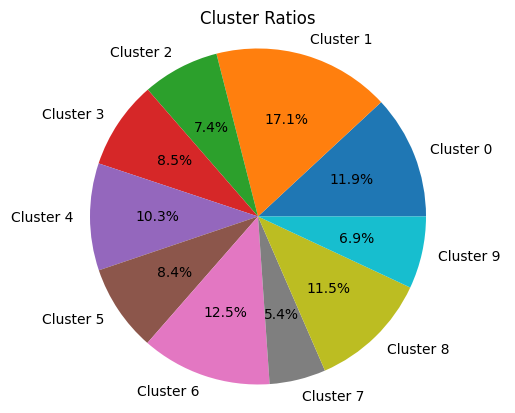

In [17]:
import matplotlib.pyplot as plt

# 各クラスタのデータ数を計算
cluster_sizes = np.bincount(cluster_labels)

# クラスタの割合を計算
cluster_ratios = cluster_sizes / np.sum(cluster_sizes)

# クラスタラベルを文字列に変換
cluster_labels_str = [f"Cluster {i}" for i in range(n_clusters)]

# 円グラフを描画
plt.pie(cluster_ratios, labels=cluster_labels_str, autopct="%1.1f%%")
plt.axis("equal")  # アスペクト比を保持して円形にする
plt.title("Cluster Ratios")
plt.show()

In [18]:
genre_matrix.sum(axis=0)

array([2845., 2348.,   72., 4645.,  240.,  294., 2016.,  637., 2309.,
        181.,  317., 1141.,  806.,  369.,   54., 1609.,  778.,  265.,
        944.,  426.,  860.,  495.,  408.,  197.,  229., 1464.,  148.,
       1220., 2070.,  547.,  603.,   55., 1711.,   65., 1220.,  381.,
        543.,  465., 1037.,   87.,  102.,   39.,   42.])

In [19]:
for k, n in zip(genre_index.keys(), genre_matrix.sum(axis=0)):
    print(f"{k}: {n}")

Action: 2845.0
Adventure: 2348.0
Cars: 72.0
Comedy: 4645.0
Dementia: 240.0
Demons: 294.0
Drama: 2016.0
Ecchi: 637.0
Fantasy: 2309.0
Game: 181.0
Harem: 317.0
Hentai: 1141.0
Historical: 806.0
Horror: 369.0
Josei: 54.0
Kids: 1609.0
Magic: 778.0
Martial Arts: 265.0
Mecha: 944.0
Military: 426.0
Music: 860.0
Mystery: 495.0
Parody: 408.0
Police: 197.0
Psychological: 229.0
Romance: 1464.0
Samurai: 148.0
School: 1220.0
Sci-Fi: 2070.0
Seinen: 547.0
Shoujo: 603.0
Shoujo Ai: 55.0
Shounen: 1711.0
Shounen Ai: 65.0
Slice of Life: 1220.0
Space: 381.0
Sports: 543.0
Super Power: 465.0
Supernatural: 1037.0
Thriller: 87.0
Vampire: 102.0
Yaoi: 39.0
Yuri: 42.0


## 1000以上の作品に含まれるジャンルのみでクラスタリング

In [20]:
# ジャンルのリストをソートして、インデックスを付ける
genre_list = sorted(list(all_genres))
genre_index = {genre: i for i, genre in enumerate(genre_list)}

# genreが含まれるかどうかを0/1で表現したndarrayを作成
num_rows = df.shape[0]
num_genres = len(genre_list)
genre_matrix = np.zeros((num_rows, num_genres))

for row_idx, genres in enumerate(df['genre']):
    for genre in genres:
        genre_idx = genre_index[genre]
        genre_matrix[row_idx, genre_idx] = 1

# 要素数を数える
genre_counts = genre_matrix.sum(axis=0)

# 500より大きいジャンルのインデックスのみ保持
valid_genre_indices = np.where(genre_counts > 1000)[0]

# インデックスに基づいてジャンルをフィルタリングし、新しいジャンルリストとインデックスを作成
filtered_genre_list = [genre_list[i] for i in valid_genre_indices]
filtered_genre_index = {genre: i for i, genre in enumerate(filtered_genre_list)}

# フィルタリングされたジャンルのみを考慮した新しいgenre_matrixを作成
num_filtered_genres = len(filtered_genre_list)
filtered_genre_matrix = np.zeros((num_rows, num_filtered_genres))

for row_idx, genres in enumerate(df['genre']):
    for genre in genres:
        if genre in filtered_genre_index:
            genre_idx = filtered_genre_index[genre]
            filtered_genre_matrix[row_idx, genre_idx] = 1

print(filtered_genre_matrix)

# フィルタリングされたジャンルの要素数を数える
filtered_genre_counts = filtered_genre_matrix.sum(axis=0)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 1. 0. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


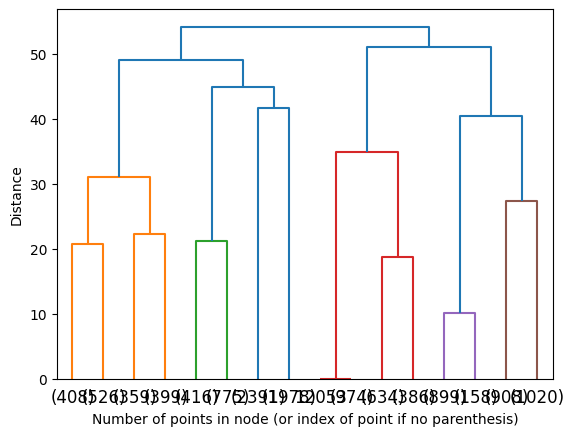

In [21]:
# 階層型クラスタリングのモデルを作成
# n_clusters=None, distance_threshold=0 に設定して、フルツリーを作成
model = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', distance_threshold=0)

# クラスタリングを実行
model = model.fit(filtered_genre_matrix)

# デンドログラム用のリンケージ行列を作成
counts = np.zeros(model.children_.shape[0])
n_samples = len(model.labels_)
for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # 葉ノード
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

# デンドログラムを描画
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis)")
plt.ylabel("Distance")
plt.show()

In [22]:
# 適切なクラスタ数を設定
n_clusters = 8

# クラスタリングのモデルを作成し、クラスタリングを実行
model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
model = model.fit(filtered_genre_matrix)

# クラスタリング結果を取得
cluster_labels = model.labels_

# 各クラスタのジャンル出現回数を集計
genre_counts_per_cluster = np.zeros((n_clusters, num_filtered_genres), dtype=int)
for cluster_label, genre_row in zip(cluster_labels, filtered_genre_matrix):
    genre_counts_per_cluster[cluster_label] += genre_row.astype(int)

# クラスタ内のジャンル出現割合を計算
cluster_sizes = np.sum(genre_counts_per_cluster, axis=1)
genre_ratios_per_cluster = genre_counts_per_cluster / cluster_sizes[:, np.newaxis]

# ジャンル出現割合を表示
for i, genre_ratios in enumerate(genre_ratios_per_cluster):
    print(f"Cluster {i}:")
    for genre, ratio in zip(filtered_genre_index, genre_ratios):
        print(f"  {genre}: {ratio:.2f}")
    print()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster 0:
  Action: 0.00
  Adventure: 0.01
  Comedy: 0.46
  Drama: 0.02
  Fantasy: 0.02
  Hentai: 0.00
  Kids: 0.04
  Romance: 0.04
  School: 0.08
  Sci-Fi: 0.01
  Shounen: 0.02
  Slice of Life: 0.28
  Supernatural: 0.01

Cluster 1:
  Action: 0.10
  Adventure: 0.26
  Comedy: 0.20
  Drama: 0.01
  Fantasy: 0.17
  Hentai: 0.00
  Kids: 0.15
  Romance: 0.00
  School: 0.00
  Sci-Fi: 0.02
  Shounen: 0.08
  Slice of Life: 0.00
  Supernatural: 0.00

Cluster 2:
  Action: 0.21
  Adventure: 0.04
  Comedy: 0.15
  Drama: 0.06
  Fantasy: 0.08
  Hentai: 0.01
  Kids: 0.01
  Romance: 0.02
  School: 0.09
  Sci-Fi: 0.04
  Shounen: 0.15
  Slice of Life: 0.01
  Supernatural: 0.14

Cluster 3:
  Action: 0.01
  Adventure: 0.01
  Comedy: 0.01
  Drama: 0.16
  Fantasy: 0.31
  Hentai: 0.00
  Kids: 0.45
  Romance: 0.01
  School: 0.00
  Sci-Fi: 0.00
  Shounen: 0.01
  Slice of Life: 0.02
  Supernatural: 0.01

Cluster 4:
  Action: 0.21
  Adventure: 0.15
  Comedy: 0.11
  Drama: 0.01
  Fantasy: 0.05
  Hentai: 0.00
  Ki

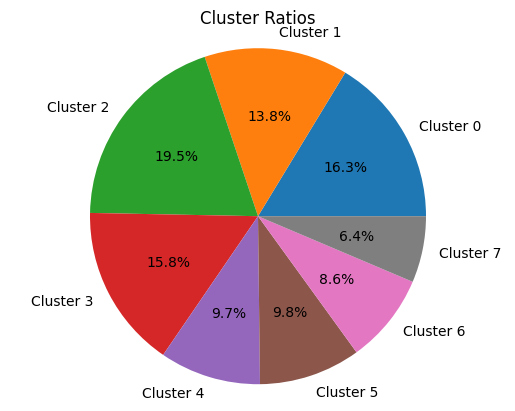

In [23]:
import matplotlib.pyplot as plt

# 各クラスタのデータ数を計算
cluster_sizes = np.bincount(cluster_labels)

# クラスタの割合を計算
cluster_ratios = cluster_sizes / np.sum(cluster_sizes)

# クラスタラベルを文字列に変換
cluster_labels_str = [f"Cluster {i}" for i in range(n_clusters)]

# 円グラフを描画
plt.pie(cluster_ratios, labels=cluster_labels_str, autopct="%1.1f%%")
plt.axis("equal")  # アスペクト比を保持して円形にする
plt.title("Cluster Ratios")
plt.show()